In [1]:
# Joo Kai Tay, 22489437, lab02
# Importing libraries 
import numpy as np
import math
import matplotlib.pyplot as plt
from skimage import io, color
from scipy import signal 
import cv2

# Processing Image 1

Text(0.5, 1.0, 'cat.jpg')

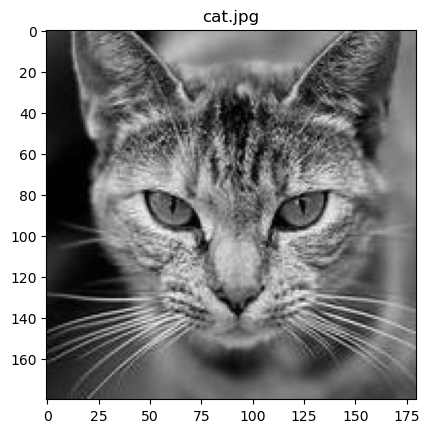

In [2]:
# Read Image 1
file_name_1 = 'cat.jpg'
im1 = cv2.imread(file_name_1)

# Convert Original Image 1 to grayscale 
gray1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

# Display Original Image 1
plt.imshow(cv2.cvtColor(gray1, cv2.COLOR_BGR2RGB))
plt.title(file_name_1)

# # Calling Low-pass Filter

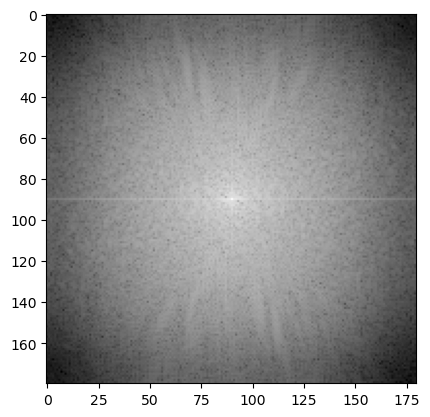

In [3]:
import numpy as np
import scipy

# Create hamming window
r = 5 # Radius of the window
ham = np.hamming(180)[:,None] 
ham2d = np.sqrt(np.dot(ham, ham.T)) ** r 

# Apply Fourier Transform on the image
f = cv2.dft(gray1.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = ham2d * f_complex

f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

plt.imshow(np.log(abs(f_filtered)), cmap='gray')

In [4]:
#get blurred image. take the magnitude and plot it

# import numpy as np
# import scipy
# def low_pass_filter(signal, cutoff_frequency, sample_rate):
#  nyquist_frequency = sample_rate / 2
#  normalized_cutoff_frequency = cutoff_frequency / nyquist_frequency
#  b, a = scipy.signal.butter(4, normalized_cutoff_frequency, 'low')
#  filtered_signal = scipy.signal.filtfilt(b, a, signal)
#  return filtered_signal

# # Convert to numpy array
# gray_data_1 = np.array(gray1, dtype=float)

# # Call low-pass filter
# blurred_1 = low_pass_filter(gray_data_1, 0.2, 3)

# # Display Blurred Image 1
# plt.imshow(blurred_1, cmap='gray')
# plt.title(file_name_1)


In [5]:
# Take Fourier Transform of Image 
# take a log scale
# blurred_1_ft = np.fft.fftshift(np.fft.fft2(blurred_1))
# plt.imshow(np.log(abs(blurred_1_ft)), cmap='gray')

# plt.show()

In [6]:
def low_pass_filter(signal, cutoff_frequency, sample_rate):
    nyquist_frequency = sample_rate / 2
    normalized_cutoff_frequency = cutoff_frequency / nyquist_frequency
    sos = scipy.signal.butter(4, normalized_cutoff_frequency, 'low')
    return sos

In [9]:
import numpy as np
import scipy

gray_data_1 = np.array(gray1, dtype=float)
heckin = low_pass_filter(gray_data_1, 0.2, 3)

# Apply Fourier Transform on the image
f = cv2.dft(gray1.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = heckin * f_complex

f_filtered_shifted = np.fft.fftshift(f_filtered)
inv_img = np.fft.ifft2(f_filtered_shifted) # inverse F.T.
filtered_img = np.abs(inv_img)
filtered_img -= filtered_img.min()
filtered_img = filtered_img*255 / filtered_img.max()
filtered_img = filtered_img.astype(np.uint8)

plt.imshow(np.log(abs(f_filtered)), cmap='gray')

ValueError: operands could not be broadcast together with shapes (2,5) (180,180) 